## IMPORTING LIBERARIES


In [2503]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score
%matplotlib inline


## CLEANING DATA

In [2504]:
df= pd.read_csv("Bengaluru_House_Data.csv")


In [2505]:
df.shape

(13320, 9)

In [2506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [2507]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2508]:

for i in df.columns:
    print(df[i].value_counts())


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          

In [2509]:
#Exploratory Data Analysis

#from ydata_profiling import ProfileReport

# report= ProfileReport(df)
# report.to_file(output_file= 'report.html') 

In [2510]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [2511]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [2512]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2513]:
# dropping columns not useful for prediction

df=df.drop(['area_type', 'availability', 'society', 'balcony'], axis =1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


C:\Users\Utsav Jana\AppData\Local\Temp\ipykernel_19124\2821797058.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bath'])


<Axes: xlabel='bath', ylabel='Density'>

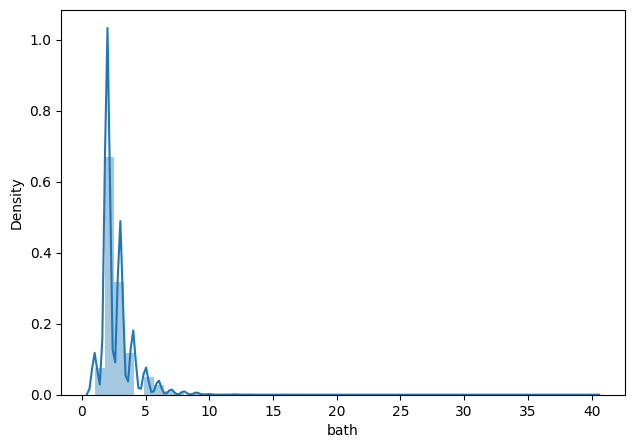

In [2514]:
plt.figure(figsize= (16,5))
plt.subplot(1,2,1)
sns.distplot(df['bath'])

### totla_sqft

In [2515]:
#df['total_sqft'].skew()

In [2516]:
#since total_sqft has range we will take mean of both bounds to get the total_sqft

df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [2517]:
#converts ranges to float

def convertRange(sqft):
    bounds=  sqft.split('-')
    if len(bounds) == 2:
        return (float(bounds[0]) + float(bounds[1])) / 2
    
    try:
        return float(sqft)

    except:
        return None  



df['total_sqft']= df['total_sqft'].apply(convertRange)


In [2518]:
#fillinf in nan values

df['total_sqft']=df['total_sqft'].fillna(df['total_sqft'].mean())

In [2519]:
df['total_sqft'].skew()  #heavily left skewed

15.293760931674944

### location

In [2520]:
location=df['location'].value_counts()
location.to_csv("locations.csv", index= False)

In [2521]:
df['location'].describe()

count          13319
unique          1305
top       Whitefield
freq             540
Name: location, dtype: object

In [2522]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [2523]:
#filling in the missing data with top location

df['location'] = df['location'].fillna('Whitefield')

In [2524]:
df['location'].describe()

count          13320
unique          1305
top       Whitefield
freq             541
Name: location, dtype: object

In [2525]:
#binning all values which have frequency less than 10 into 'others'

df['location']= df['location'].apply(lambda x: x.strip()) # clearing white spaces infront and at the back of the elements
location_value_count= df['location'].value_counts()
location_value_count_under_10= location_value_count[location_value_count<=10]
location_value_count_under_10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [2526]:
df['location']= df['location'].apply(lambda x: 'others' if x in location_value_count_under_10 else x)
df['location'].value_counts()

location
others                2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [2527]:
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                      others
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

### size

In [2528]:
df['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [2529]:
df['size'].describe()

count     13304
unique       31
top       2 BHK
freq       5199
Name: size, dtype: object

In [2530]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [2531]:
#filling missing values with top frequency element

df['size']= df['size'].fillna('2 BHK')

In [2532]:
df['size'].describe()

count     13320
unique       31
top       2 BHK
freq       5215
Name: size, dtype: object

In [2533]:
#splitting at the blank space to only extract the numerical data to a new column

df['bhk'] = df['size'].str.split().str.get(0)
#df["bhk"] = pd.to_numeric(df["bhk"], errors="coerce")
# df.dropna(subset=['bhk'], inplace= True)
df['bhk']= df['bhk'].astype(int)
df= df.drop(['size'], axis= 1)
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,others,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [2534]:
#deleting all unresonable bhk values from dataset
df[df.bhk >=10]

,location,total_sqft,bath,price,bhk
459,others,5000.0,9.0,360.0,11
1718,others,8000.0,27.0,230.0,27
1735,others,750.0,10.0,90.0,10
1768,others,1200.0,11.0,170.0,11
1795,others,1660.0,10.0,475.0,10
3096,others,12000.0,12.0,525.0,10
3379,others,2000.0,16.0,490.0,19
3523,Jigani,1200.0,10.0,105.0,10
3609,others,10000.0,16.0,550.0,16
3853,others,1200.0,6.0,150.0,11


In [2535]:
df = df.drop(index=(df[df.bhk >10].index))
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,others,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


### bath

In [2536]:
df['bath'].describe()

count    13235.000000
mean         2.680771
std          1.253324
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: bath, dtype: float64

In [2537]:
#
df["bath"] = pd.to_numeric(df["bath"], errors="coerce")
df['bath']= df['bath'].fillna(df['bath'].median())
df['bath']= df['bath'].astype(int)
df


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2,39.07,2
1,Chikka Tirupathi,2600.0,5,120.00,4
2,Uttarahalli,1440.0,2,62.00,3
3,Lingadheeranahalli,1521.0,3,95.00,3
4,Kothanur,1200.0,2,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4,231.00,5
13316,others,3600.0,5,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2
13318,Padmanabhanagar,4689.0,4,488.00,4


### PRICE

In [2538]:
#adding a new column of prize per sqft 
df['price_per_sqft']= df['price']*100000/df['total_sqft']


## OUTLIER DETECTION AND REMOVAL

In [2539]:
df.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13308.000000,13308.000000,13308.000000,13308.000000,1.330800e+04
mean,1557.583451,2.677036,112.392106,2.789826,7.908743e+03
std,1231.918146,1.250893,148.840961,1.190666,1.062941e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266434e+03
50%,1279.000000,2.000000,72.000000,3.000000,5.434783e+03
75%,1676.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,14.000000,3600.000000,10.000000,1.200000e+07


In [2540]:
# checking for average sqft per bhk
(df['total_sqft']/df['bhk']).describe()

count    13308.000000
mean       575.863831
std        388.531975
min          0.250000
25%        473.625000
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [2541]:
#since it is not possible for a bhk to have 0.25 sqft we remove any entries with less than 300 sqft(outliers)

df= df[((df['total_sqft']/df['bhk']) >=250)]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12700.000000,12700.000000,12700.000000,12700.000000,12700.000000
mean,1587.666274,2.566850,111.547059,2.662126,6356.641037
std,1251.146448,1.080661,151.516403,0.983171,4219.558878
min,250.000000,1.000000,8.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4213.976413
50%,1300.000000,2.000000,70.000000,3.000000,5305.794343
75%,1700.000000,3.000000,116.000000,3.000000,6978.096084
max,52272.000000,14.000000,3600.000000,10.000000,176470.588235


In [2542]:
df['bath'].skew()
#skewed column

2.0249847864648616

<Axes: ylabel='bath'>

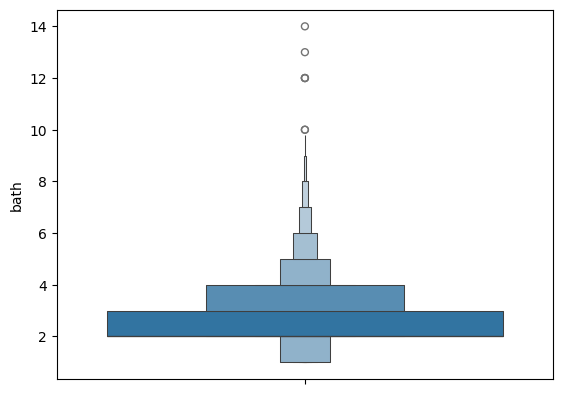

In [2543]:
sns.boxenplot(df['bath'])

In [2544]:
# performing IQR method on bath

Q1 = df['bath'].quantile(0.25)
Q3 = df['bath'].quantile(0.75)

IqR= Q3 - Q1

lower_bound = Q1 - 1.5 * IqR
upper_bound = Q3 - 1.5 * IqR

In [2545]:
Q1

2.0

In [2546]:
lower_bound

0.5

In [2547]:
upper_bound

#doesnt work

1.5

In [2548]:
#since every bedroom can have 1 bathroom at max and 2 bathroom can be in the living room or other areas, thus we remove any bathroom entries > bhk + 2

df = df[df.bath < df.bhk + 2]
df


,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,95.00,3,6245.890861
4,Kothanur,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4,231.00,5,6689.834926
13316,others,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4,488.00,4,10407.336319


In [2549]:
#since the average price per sqft is 6000, anything below that will be discarded

''' df= df[(df.price_per_sqft <6000)]
df '''

# loosing too much data

' df= df[(df.price_per_sqft <6000)]\ndf '

In [2550]:
# considering only  entries with  price_per_sqft within 1 standard deviation from the left or right of mean

def remove_price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>=(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

    
df = remove_price_per_sqft_outliers(df)
df.shape


(10363, 6)

In [2551]:
# dropping price per sqft as it was only intended to remove outliers
df= df.drop(columns=['price_per_sqft'], axis= 1)
df

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4,428.00,4
1,1st Block Jayanagar,1630.0,3,194.00,3
2,1st Block Jayanagar,1875.0,2,235.00,3
3,1st Block Jayanagar,1200.0,2,130.00,3
4,1st Block Jayanagar,1235.0,2,148.00,2
...,...,...,...,...,...
10358,others,1353.0,2,110.00,2
10359,others,812.0,1,26.00,1
10360,others,1440.0,2,63.93,3
10361,others,1075.0,2,48.00,2


In [2552]:
df.to_csv('cleaned_data.csv')

## MODEL 

In [2553]:
X= df.drop(columns=['price'], axis=1)
y=df['price']


In [2554]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=41)
print(X_train.shape, X_test.shape)

(8290, 4) (2073, 4)


In [2555]:
#turning categorical column into numerical using OHE

trans1= ColumnTransformer(transformers= [('trans1', OneHotEncoder(sparse_output= False, drop= 'first'), ['location'] )
], remainder= 'passthrough')


In [2556]:
trans2= StandardScaler()
trans3= LinearRegression()
pipe=Pipeline([
    ('trans1', trans1),
    ('trans2', trans2),
    ('trans3', trans3)
])